# Nettoyez et analysez votre jeu de données Nettoyez et analysez votre jeu de données 

## Nettoyer vos données avec python

### Detecter les erreurs

In [91]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [92]:
# chargement et affichage des données
data = pd.read_csv("personnes.csv")
display(data)


,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


#### Valeurs manquantes

In [93]:
# Detecter les valeurs manquante (les NULL)
print(data.isnull().sum())


prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


#### Doublons

In [94]:
# Detecter les doublons
data.loc[data["email"].duplicated(keep=False), :]


,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


### Traitez les erreurs : 

#### Theorie

`# Nouvelle dataframe :`

`data['nom_colonne'] = nouvelle_colonne`

`mask = # condition à vérifier pour cibler spécifiquement certaines lignes`

`data.loc[mask, 'ma_colonne'] = nouvelles_valeurs`

#### Traitez les pays :

In [95]:
display(data["pays"])


0           France
1              NaN
2    Côte d'ivoire
3           France
4       Madagascar
5               24
6            Bénin
Name: pays, dtype: object

- Le probleme etait que il y a la valeur 24 qui ne correspond pas a un pays
- Pour regler cette erreurs nous allons creer un dictionnaire ou nous allons mettre nos pays
- Nous alons donc verifier si le pays correspond ou non a un pays du dictionnaire
- Si il correspond alors tout est bon
- Si ça correspond pas alors on met un ***NaN***

In [96]:
VALID_COUNTRIES = ["France", "Côte d'ivoire", "Madagascar", "Bénin", "Allemagne", "USA"]
mask = ~data["pays"].isin(VALID_COUNTRIES)
data.loc[mask, "pays"] = np.NaN
display(data["pays"])


0           France
1              NaN
2    Côte d'ivoire
3           France
4       Madagascar
5              NaN
6            Bénin
Name: pays, dtype: object

On remarque que la valeur ***24*** qui n'etait pas dans le dictionnaire er devnu la valeur ***Nan***

#### Traitez les e-mails

In [97]:
data["email"]


0                         leila@example.com
1                    samuel_329@example.com
2                  choupipoune@supermail.eu
3    marco23@example.com, mc23@supermail.eu
4                   helloworld@supermail.eu
5                    hanna2019@supermail.eu
6                    samuel_329@example.com
Name: email, dtype: object

Au tour des e-mails, maintenant ! Le problème avec cette colonne, c'est qu'il y a parfois 2 adresses e-mail par ligne. Nous ne souhaitons prendre que la première

In [98]:
data["email"] = data["email"].str.split(",", n=1, expand=True)[0]
display(data["email"])


0           leila@example.com
1      samuel_329@example.com
2    choupipoune@supermail.eu
3         marco23@example.com
4     helloworld@supermail.eu
5      hanna2019@supermail.eu
6      samuel_329@example.com
Name: email, dtype: object

Nous avons plus que un email par ligne

#### Traitez les tailles

In [99]:
display(data["taille"])


0    1.49m
1    1.67m
2    153cm
3    1.65m
4    1.34m
5    3.45m
6    1.45m
Name: taille, dtype: object

On remarque une taille impossible et un taille en cm

Ici nous decidons de garder seulement les taille en m. Et puis de donner les taille manquantes grace a la moyenne des autre tailles. Nous ne faisons pax la conversion cm -> m

In [100]:
data["taille"] = data["taille"].str[:-1]
data["taille"] = pd.to_numeric(data["taille"], errors="coerce")
display(data["taille"])


0    1.49
1    1.67
2     NaN
3    1.65
4    1.34
5    3.45
6    1.45
Name: taille, dtype: float64

In [101]:
data.loc[data["taille"].isnull(), "taille"] = data["taille"].mean()
data["taille"] = data["taille"].round(2)
display(data["taille"])


0    1.49
1    1.67
2    1.84
3    1.65
4    1.34
5    3.45
6    1.45
Name: taille, dtype: float64

On remarque que il rest la taille de 3.45 m 
On va essayrer de la traiter

In [102]:
data.loc[(data["taille"] <= 1.0) | (data["taille"] >= 2.5), "taille"] = data[
    "taille"
].mean()
data["taille"] = data["taille"].round(2)
display(data["taille"])


0    1.49
1    1.67
2    1.84
3    1.65
4    1.34
5    1.84
6    1.45
Name: taille, dtype: float64

On remarque que nous avons remplacer la valeur trop haute

#### Triez les dates

Nous allons spécifier un certain format de date, et transformer notre variable dans un type adéquat. Les formats non adequat vont etre transformer en NaN grace à ***coerce*** comme pour les tailles

In [103]:
data["date_naissance"] = pd.to_datetime(
    data["date_naissance"], format="%d/%m/%Y", errors="coerce"
)
display(data["date_naissance"])


0   1990-01-23
1   2001-09-20
2          NaT
3   1978-02-10
4   2008-03-05
5   1970-01-01
6          NaT
Name: date_naissance, dtype: datetime64[ns]

### Exercice chapitre 2

In [104]:
# importation des données
df_operation = pd.read_csv("operations.csv")
df_operation.head()


,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


<p>Instruction</p>
<blockquote> Plusieurs erreurs se sont glissées dans ce jeu de données. Votre mission, si toutefois vous l'acceptez, va être de les trouver et de proposer des solutions adéquates pour les gérer. Vous aurez besoin dans tous les cas de nettoyer votre fichier avant de passer à la suite !</blockquote>

**Premiere étape : on enleve les doublons**

In [105]:
df_operation = df_operation.loc[df_operation.duplicated(keep="first") == False, :]


**2 : On supprime les nan** 

In [106]:
# display(df_operation.loc[df_operation.isnull(),:])
print(df_operation.isnull().sum())


date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64


- valeur manquante en catégorie : on va mettre autre

- valeur manquante en montant on peut la calculer

---------------
Ici je triche car la correction a tricher et je vux avoir les meme valeur que la correction 

In [107]:
df_operation.loc[df_operation["categ"].isnull(), "categ"] = "FACTURE TELEPHONE"


-----------

In [108]:
# Categ
display(df_operation.loc[df_operation["categ"].isnull(), :])
df_operation.loc[df_operation["categ"].isnull(), "categ"] = "AUTRE"
display(df_operation.loc[df_operation["categ"].isnull(), :])


,date_operation,libelle,montant,solde_avt_ope,categ


,date_operation,libelle,montant,solde_avt_ope,categ


On recalculera les montants plus tard lorsqu'on verifiera les calcules

**3: traitez les dates opérations**
- verifier le format
- Si pas le bon format on le rend `null`

In [109]:
df_operation["date_operation"] = pd.to_datetime(
    df_operation["date_operation"], errors="coerce"
)


**4 : Gerer les libellées**

Je ne voit pas d'erreur dans les libellé et je ne vois pas comment les gerer.


**5 : Verifier que le montant avant opertion et le solde concorde**

Il faut verifier $ \forall i \in [\![1:n]\!], \ montant[i]=solde\_avt\_ope[i+1]-solde\_avt\_ope[i]$

In [110]:
array_operation = df_operation.to_numpy()
# montant : [i,2] / solde_avt_ope : [i,3]
for i in range(0, array_operation.shape[0] - 1):
    # print(round(array_operation[i + 1, 3] - array_operation[i, 3], 2))
    # print(array_operation[i, 2])
    if pd.isna(array_operation[i, 2]):
        array_operation[i, 2] = round(
            array_operation[i + 1, 3] - array_operation[i, 3], 2
        )
    if array_operation[i, 2] != round(
        array_operation[i + 1, 3] - array_operation[i, 3], 2
    ):
        array_operation[i, 2] = round(
            array_operation[i + 1, 3] - array_operation[i, 3], 2
        )

df_operation.loc[:, :] = array_operation


<font color='green'>**Correction**

J'ai pas penser a verfier les type de mes variables

In [111]:
df_operation.dtypes


date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

En effet, les date ne sont pas des objet date mais `object` ce qui signifie string

<font color='green'>Ce n'etait dans le bon type par ce que j'ai oublie d'ecraser les anciennes valeur par les nouvelles..

Pour le reste, c'est plutot pas mal j'aurais pu utiliser **`.drop_duplicate`** pour supprimer les doublons avec le commande : `data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)`

Pour reperer les **outliers**, la correction propose d'utiliser la fonction `.describe`

In [112]:
df_operation.describe()


,montant,solde_avt_ope
count,308.000000,308.000000
mean,2.872565,3395.301071
std,176.089858,667.109412
min,-602.270000,1416.810000
25%,-20.047500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


le montant semble louche en effet ....
Mon calcule n'a donc pas ete fait correctement.. 

# Partie 3 : 

### Représentez la distribution empirique d'une variable

#### Cas des variables qualitatives

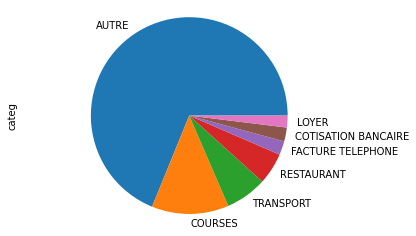

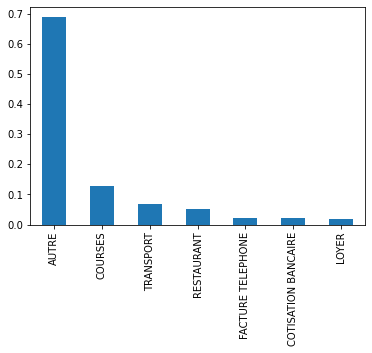

In [113]:
# Diagramme en secteurs
df_operation["categ"].value_counts(normalize=True).plot(kind="pie")
# display(df_operation["categ"].value_counts())
# value_count() permet de faire un effectif et normalize le met entre 0 et 1
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis("equal")
plt.show()  # Affiche le graphique

# Diagramme en tuyaux d'orgues
df_operation["categ"].value_counts(normalize=True).plot(kind="bar")
plt.show()


#### Cas des variables quantitatives
##### Variables discrètes

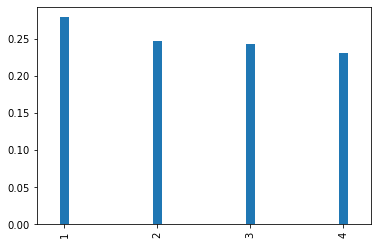

In [114]:
df_operation["quart_mois"] = [
    int((jour - 1) * 4 / 31) + 1 for jour in df_operation["date_operation"].dt.day
]
# Diagramme en bâtons
df_operation["quart_mois"].value_counts(normalize=True).plot(kind="bar", width=0.1)
plt.show()


##### Variables continues

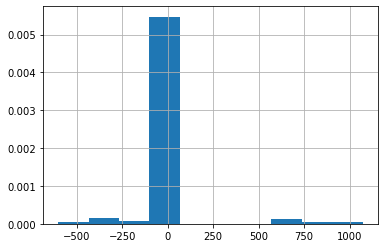

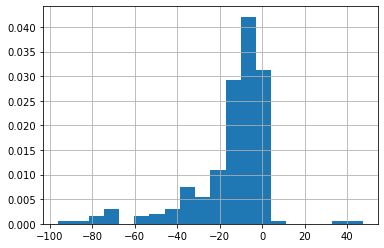

In [115]:
# Histogramme
df_operation["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
df_operation[df_operation.montant.abs() < 100]["montant"].hist(density=True, bins=20)
plt.show()


### Présentez une variable sous forme de tableau

#### Variable qualitative

In [123]:
import dis


tab_qualitatif = pd.DataFrame(
    [
        df_operation["categ"].value_counts().index[:],
        df_operation["categ"].value_counts(),
        df_operation["categ"].value_counts(normalize=True),
    ],
    ["categ", "n", "f"],
).transpose()
display(tab_qualitatif)


,categ,n,f
0,AUTRE,212,0.688312
1,COURSES,39,0.126623
2,TRANSPORT,21,0.068182
3,RESTAURANT,16,0.051948
4,FACTURE TELEPHONE,7,0.022727
5,COTISATION BANCAIRE,7,0.022727
6,LOYER,6,0.019481


#### Variable quantitative

In [118]:
effectifs = df_operation["quart_mois"].value_counts()
modalites = effectifs.index  # l'index de effectifs contient les modalités

tab = pd.DataFrame(
    modalites, columns=["quart_mois"]
)  # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(
    df_operation
)  # len(df_operation) renvoie la taille de l'échantillon


In [119]:
tab = tab.sort_values("quart_mois")  # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum()  # cumsum calcule la somme cumulée


In [120]:
display(tab)


,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


## P3 - Chap 3 : Découvrez les enjeux de l'analyse univariée

## P3 - Chap 4 : Découvrez les mesures de tendance centrale

In [125]:
df_operation["montant"].mode()


0   -1.6
Name: montant, dtype: float64

In [126]:
df_operation["montant"].mean()


2.8725649350649407

In [127]:
df_operation["montant"].median()


-9.6

In [134]:
df_mmm_type = df_operation.groupby("categ").agg(
    {"montant": ["mean", pd.Series.mode, pd.Series.median]}
)
display(df_mmm_type)


montant  \
                           mean   
categ                             
AUTRE                 23.433208   
COTISATION BANCAIRE   -1.885714   
COURSES              -16.341282   
FACTURE TELEPHONE    -12.045714   
LOYER               -345.000000   
RESTAURANT           -10.332500   
TRANSPORT            -52.997143   

                                                                                
                                                                  mode  median  
categ                                                                           
AUTRE                                                             -1.6   -8.31  
COTISATION BANCAIRE                                              -1.92   -1.92  
COURSES              [-60.16, -42.45, -42.42, -33.55, -32.67, -29.1...  -12.24  
FACTURE TELEPHONE                                       [-7.02, -6.38]   -7.02  
LOYER                                                           -345.0 -345.00  
RESTAURANT                                                        -9.2  -10.10  
TRANSPORT                                                        -73.0  -53.10

<font color='green'>Correction</font>

In [136]:
# for cat in df_operation["categ"].unique():
#     subset = df_operation.loc[df_operation.categ == cat, :] # Création du sous-échantillon
#     print("-"*20)
#     print(cat)
#     print("moy:\n",subset['montant'].mean())
#     print("med:\n",subset['montant'].median())
#     print("mod:\n",subset['montant'].mode())
#     subset["montant"].hist() # Crée l'histogramme
#     plt.show() # Affiche l'histogramme


## P3 - Chap 5 : Comprenez les mesures de dispersion

**La variance empirique**

In [138]:
df_operation["montant"].var()


31007.638040630973

variance empirique sans biais

In [140]:
df_operation["montant"].var(ddof=0)


30906.963891148403

**L'écart-type empirique**

In [142]:
df_operation["montant"].std()


176.08985785851203

coefficient de variation

In [144]:
df_operation["montant"].std() / df_operation["montant"].mean()


61.30056651079017

**L'écart interquartile** : l'equivalent du quart de la mediane

**La boîte à moustaches (boxplot)**

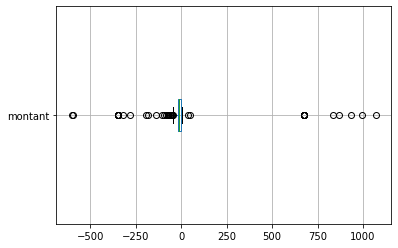

In [145]:
df_operation.boxplot(column="montant", vert=False)
plt.show()


In [175]:
df_mmm_type = df_operation.groupby("categ").agg(
    {
        "montant": [
            "mean",
            pd.Series.mode,
            pd.Series.median,
            pd.Series.std,
            pd.Series.var,
        ]
    }
)
display(df_mmm_type)


montant  \
                           mean   
categ                             
AUTRE                 23.433208   
COTISATION BANCAIRE   -1.885714   
COURSES              -16.341282   
FACTURE TELEPHONE    -12.045714   
LOYER               -345.000000   
RESTAURANT           -10.332500   
TRANSPORT            -52.997143   

                                                                        \
                                                                  mode   
categ                                                                    
AUTRE                                                             -1.6   
COTISATION BANCAIRE                                              -1.92   
COURSES              [-60.16, -42.45, -42.42, -33.55, -32.67, -29.1...   
FACTURE TELEPHONE                                       [-7.02, -6.38]   
LOYER                                                           -345.0   
RESTAURANT                                                        -9.2   
TRANSPORT                                                        -73.0   

                                                       
                     median         std           var  
categ                                                  
AUTRE                 -8.31  201.477810  40593.307860  
COTISATION BANCAIRE   -1.92    0.042762      0.001829  
COURSES              -12.24   13.479018    181.683917  
FACTURE TELEPHONE     -7.02   11.068976    122.522229  
LOYER               -345.00    0.000000      0.000000  
RESTAURANT           -10.10    1.744536      3.043407  
TRANSPORT            -53.10   48.117229   2315.267711

<AxesSubplot:>

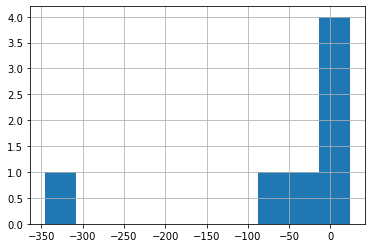

In [151]:
# histogramme des moyenne
df_mmm_type["montant"]["mean"].hist()


<AxesSubplot:>

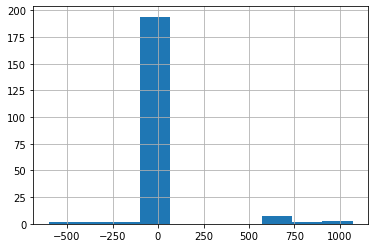

In [169]:
# histogrammes des montant de autre
df_operation.loc[df_operation["categ"] == "AUTRE", "montant"].hist()


<AxesSubplot:>

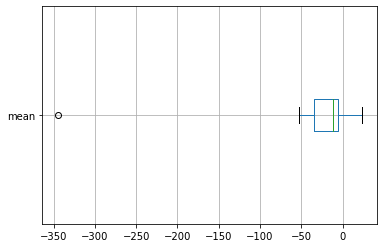

In [153]:
# moustache des moyennes
df_mmm_type["montant"].boxplot(column="mean", vert=False)


<AxesSubplot:>

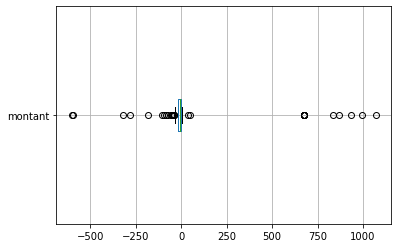

In [171]:
# moustache des autres
df_operation.loc[df_operation["categ"] == "AUTRE"].boxplot(column="montant", vert=False)


<font color='green'>**Correction**</font>

In [172]:
# for cat in df_operation["categ"].unique():
#     subset = df_operation[df_operation.categ == cat]
#     print("-"*20)
#     print(cat)
#     print("moy:\n",subset['montant'].mean())
#     print("med:\n",subset['montant'].median())
#     print("mod:\n",subset['montant'].mode())
#     print("var:\n",subset['montant'].var(ddof=0))
#     print("ect:\n",subset['montant'].std(ddof=0))
#     subset["montant"].hist()
#     plt.show()
#     subset.boxplot(column="montant", vert=False)
#     plt.show()


## P3 - Chap 6 : Appréhendez les mesures de forme

<img src=https://user.oc-static.com/upload/2017/10/25/15089224545382_distribs.png>

On remarque que les ecart type sont les meme mais les tendances sont differentes

**Le Skewness empirique**

In [173]:
df_operation["montant"].skew()


3.3618450105098843

**Le Kurtosis empirique**

In [174]:
df_operation["montant"].kurtosis()


17.2719048282677

In [176]:
df_mmm_type = df_operation.groupby("categ").agg(
    {
        "montant": [
            "mean",
            pd.Series.mode,
            pd.Series.median,
            pd.Series.std,
            pd.Series.var,
            pd.Series.skew,
            pd.Series.kurtosis,
        ]
    }
)
display(df_mmm_type)


montant  \
                           mean   
categ                             
AUTRE                 23.433208   
COTISATION BANCAIRE   -1.885714   
COURSES              -16.341282   
FACTURE TELEPHONE    -12.045714   
LOYER               -345.000000   
RESTAURANT           -10.332500   
TRANSPORT            -52.997143   

                                                                        \
                                                                  mode   
categ                                                                    
AUTRE                                                             -1.6   
COTISATION BANCAIRE                                              -1.92   
COURSES              [-60.16, -42.45, -42.42, -33.55, -32.67, -29.1...   
FACTURE TELEPHONE                                       [-7.02, -6.38]   
LOYER                                                           -345.0   
RESTAURANT                                                        -9.2   
TRANSPORT                                                        -73.0   

                                                                            
                     median         std           var      skew       kurt  
categ                                                                       
AUTRE                 -8.31  201.477810  40593.307860  3.121533  12.716538  
COTISATION BANCAIRE   -1.92    0.042762      0.001829  0.374166  -2.800000  
COURSES              -12.24   13.479018    181.683917 -1.246749   1.604730  
FACTURE TELEPHONE     -7.02   11.068976    122.522229 -2.387651   5.798563  
LOYER               -345.00    0.000000      0.000000  0.000000   0.000000  
RESTAURANT           -10.10    1.744536      3.043407 -0.888350   0.598886  
TRANSPORT            -53.10   48.117229   2315.267711 -1.248265   2.192271

## P3 - Chap 7 : Familiarisez-vous avec les mesures de concentration

**Courbe de Lorenz**

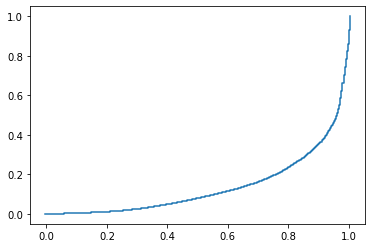

In [177]:
depenses = df_operation[df_operation["montant"] < 0]
dep = -depenses["montant"].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

xaxis = np.linspace(
    0 - 1 / n, 1 + 1 / n, n + 1
)  # Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis, lorenz, drawstyle="steps-post")
plt.show()


**Indice de Gini**

In [179]:
AUC = (
    lorenz.sum() - lorenz[-1] / 2 - lorenz[0] / 2
) / n  # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC  # surface entre la première bissectrice et le courbe de Lorenz
gini = 2 * S
gini


0.7204386813739185